# AN ANALYSIS OF MAIZE PRODUCTION PATTERNS PER COUNTY IN KENYA FROM 2012 TO 2016
## INTRODUCTION
- Agriculture is the backbone of kenya's economy
- Among the many crops grown in Kenya, maize has been found to be the most important staple food in the country
- Maize is so popular because it can be eaten as it is  through either boiling, roasting or frying
- Maize can also be processed futher to produce flour to make ugali, one of the most common foods in Kenya

## BACKGROUND
- Maize has been growing in Kenya since the 16th century when it was introduced by Arabs in the coast and spread around the country by European settlers
- As much as maize production in the country is extensive, it faces some challenges as many activities do
- ***Land available to be used for cultivation*** as well as ***climatic changes*** are some of the challenges that affect maize production
- It is therefore important to analyze past maize production in relation to the above mentioned factors to understand how much effect they have on maize production
- In addition to that, since maize is such a common food, it is also important to analyze whether local production is enough to sustain the coutry.

## OBJECTIVES
1. To identify the ***years that had highest and least maize production*** in the country
2. To find out which **counties contribute the most and least** to the total maize production in the country
3. To quantify the ***amount of land used for maize*** production in each county
4. To recognize how annual average ***precipitation affects maize*** production in each year
5. To determine whether past **local maize production** has been able to meet ***local demand***

## DATA ATTRIBUTES
- The main dataset used in this study is that of Kenya maize production per county. The dataset has 47 rows for each county. The columns show harvested area in hectares, production in metric tonnes and yield in metric tonnes per hectare for each county from the years 2012 to 2016.
- Other supporting data are also used. These are:
    * Kenya Climate data showing annual average precipitation from 1991 to 2016
    * Kenya Surface area per county showing area of each county in square kilometres
    * Maize consumption in kenya showing annual estimates of domestic cosumption of maize in Kenya

## SAMPLE OF DATASETS
1. Kenya maize production
![Kenya%20maize%20production%20and%20yields.png](attachment:Kenya%20maize%20production%20and%20yields.png  )
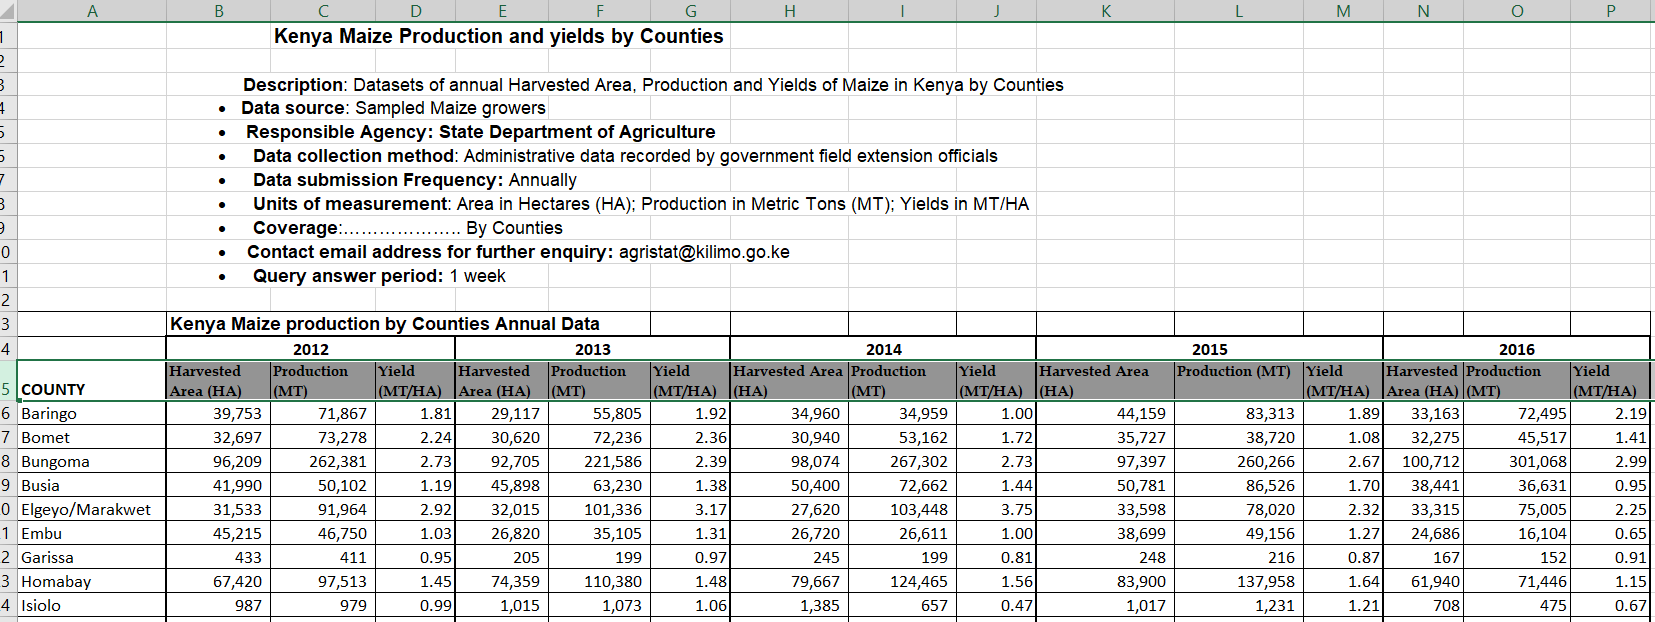

2. Kenya Climate data
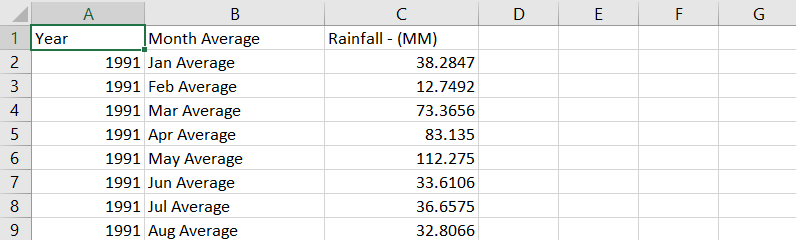

3. Kenya surface area
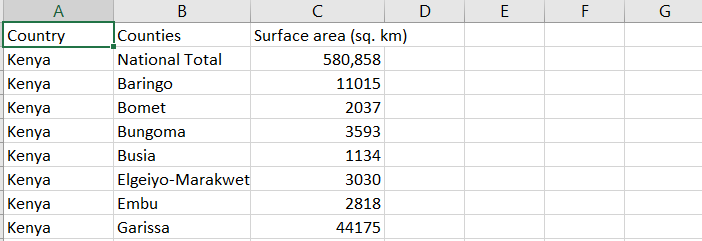

4. Kenya approximate maize consumption
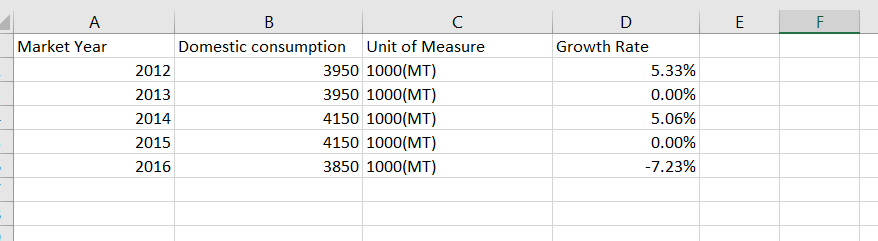

In [40]:
# Importing Libraries
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [41]:
# Importing geojson county file
Kenya_counties=json.load(open("kenya.geojson"))
Kenya_counties

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 0,
   'properties': {'OBJECTID': 1,
    'ID_': 5543,
    'COUNTY_NAM': 'NAIROBI',
    'CONST_CODE': 288,
    'CONSTITUEN': 'KAMUKUNJI',
    'COUNTY_COD': 47,
    'Shape_Leng': 1.55978672217,
    'Shape_Area': 0.057422949},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[36.90458259248316, -1.160707895679255],
      [36.908086312483185, -1.161573011679254],
      [36.91229773848317, -1.161450941679223],
      [36.915715707483166, -1.161573011679254],
      [36.9207205894832, -1.163343031679235],
      [36.92450476948317, -1.165967543679247],
      [36.92670203548317, -1.168164808679253],
      [36.9307303554832, -1.168836195679264],
      [36.93433142948316, -1.170056898679266],
      [36.9382987144832, -1.171948988679221],
      [36.94153357848318, -1.174573500679233],
      [36.940740121483195, -1.177930433679253],
      [36.931706918483194, -1.187329847679225],
      [36.922490609483184, -1.197339613679

In [42]:
# Retrieving correct county names and county codes
county_id = {}
for feature in Kenya_counties['features']:
    feature['id']=feature['properties']['COUNTY_NAM']
    county_id[feature['properties']['COUNTY_COD']] = feature['id']
county_id

{47: 'NAIROBI',
 1: 'MOMBASA',
 2: 'KWALE',
 3: 'KILIFI',
 4: 'TANA RIVER',
 5: 'LAMU',
 6: 'TAITA TAVETA',
 7: 'GARISSA',
 8: 'WAJIR',
 9: 'MANDERA',
 10: 'MARSABIT',
 11: 'ISIOLO',
 12: 'MERU',
 13: 'THARAKA - NITHI',
 14: 'EMBU',
 15: 'KITUI',
 16: 'MACHAKOS',
 18: 'NYANDARUA',
 19: 'NYERI',
 20: 'KIRINYAGA',
 21: "MURANG'A",
 22: 'KIAMBU',
 23: 'TURKANA',
 24: 'WEST POKOT',
 25: 'SAMBURU',
 27: 'UASIN GISHU',
 28: 'ELEGEYO-MARAKWET',
 29: 'NANDI',
 30: 'BARINGO',
 31: 'LAIKIPIA',
 32: 'NAKURU',
 33: 'NAROK',
 34: 'KAJIADO',
 17: 'MAKUENI',
 35: 'KERICHO',
 37: 'KAKAMEGA',
 38: 'VIHIGA',
 39: 'BUNGOMA',
 40: 'BUSIA',
 41: 'SIAYA',
 43: 'HOMA BAY',
 44: 'MIGORI',
 45: 'KISII',
 36: 'BOMET',
 46: 'NYAMIRA',
 42: 'KISUMU',
 26: 'TRANS NZOIA',
 0: None}

# Step 1 - Working on the maize production dataset

In [43]:
# Loading production data -- cleaning the data
production=pd.read_csv("Kenya Maize Production.csv")
production.head() # will show some column haedings as unnamed
# The following codes will make the first rows to be column headers
production.columns=production.iloc[0]  # will set column names to be equal to values in row 0
production=production[1:] # will remove first row from dataframe so it is used as headers
production.head()


,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA),Harvested Area (HA),Production (MT),Yield (MT/HA)
1,Baringo,"39,753","71,867",1.81,"29,117","55,805",1.92,"34,960","34,959",1,"44,159","83,313",1.89,"33,163","72,495",2.19
2,Bomet,"32,697","73,278",2.24,"30,620","72,236",2.36,"30,940","53,162",1.72,"35,727","38,720",1.08,"32,275","45,517",1.41
3,Bungoma,"96,209","262,381",2.73,"92,705","221,586",2.39,"98,074","267,302",2.73,"97,397","260,266",2.67,"100,712","301,068",2.99
4,Busia,"41,990","50,102",1.19,"45,898","63,230",1.38,"50,400","72,662",1.44,"50,781","86,526",1.7,"38,441","36,631",0.95
5,Elgeyo/Marakwet,"31,533","91,964",2.92,"32,015","101,336",3.17,"27,620","103,448",3.75,"33,598","78,020",2.32,"33,315","75,005",2.25


In [44]:
# seperating data into the various years and adding the columns indicating the years

prod_2012=pd.DataFrame(production.iloc[:, [0,1,2,3]])
year=['2012']*48  # Adding a new column to the dataframe that shows the year
prod_2012['Year']=year
print(prod_2012.head())

prod_2013=pd.DataFrame(production.iloc[:, [0,4,5,6]])
year_2013=['2013']*48
prod_2013['Year']=year_2013
print(prod_2013.head())

prod_2014=pd.DataFrame(production.iloc[:, [0,7,8,9]])
year_2014=['2014']*48
prod_2014['Year']=year_2014
print(prod_2014.head())

prod_2015=pd.DataFrame(production.iloc[:, [0,10,11,12]])
year_2015=['2015']*48
prod_2015['Year']=year_2015
print(prod_2015.head())

prod_2016=pd.DataFrame(production.iloc[:, [0,13,14,15]])
year_2016=['2016']*48
prod_2016['Year']=year_2016
print(prod_2016.head())

0           COUNTY Harvested Area (HA) Production (MT) Yield (MT/HA)  Year
1          Baringo              39,753          71,867          1.81  2012
2            Bomet              32,697          73,278          2.24  2012
3          Bungoma              96,209         262,381          2.73  2012
4            Busia              41,990          50,102          1.19  2012
5  Elgeyo/Marakwet              31,533          91,964          2.92  2012
0           COUNTY Harvested Area (HA) Production (MT) Yield (MT/HA)  Year
1          Baringo              29,117          55,805          1.92  2013
2            Bomet              30,620          72,236          2.36  2013
3          Bungoma              92,705         221,586          2.39  2013
4            Busia              45,898          63,230          1.38  2013
5  Elgeyo/Marakwet              32,015         101,336          3.17  2013
0           COUNTY Harvested Area (HA) Production (MT) Yield (MT/HA)  Year
1          Baringo       

In [45]:
# Combining the independent dataframes
production_per_year=pd.concat([prod_2012,prod_2013,prod_2014,prod_2015,prod_2016])
production_per_year.head(50)
# Filtering out the 'Total' row from the dataset using county column
prod_per_year_filt=production_per_year[production_per_year['COUNTY']!='Total']
production_complete=pd.DataFrame(prod_per_year_filt)
production_complete.head(50)

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year
1,Baringo,"39,753","71,867",1.81,2012
2,Bomet,"32,697","73,278",2.24,2012
3,Bungoma,"96,209","262,381",2.73,2012
4,Busia,"41,990","50,102",1.19,2012
5,Elgeyo/Marakwet,"31,533","91,964",2.92,2012
6,Embu,"45,215","46,750",1.03,2012
7,Garissa,433,411,0.95,2012
8,Homabay,"67,420","97,513",1.45,2012
9,Isiolo,987,979,0.99,2012
10,Kajiado,"30,145","2,218",0.07,2012


In [46]:
# Removing commas from harvest area and production columns
production_complete['Harvested Area (HA)']=production_complete['Harvested Area (HA)'].str.replace(',','', regex=True)
production_complete['Production (MT)']=production_complete['Production (MT)'].str.replace(',','', regex=True)
production_complete.head(47)

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year
1,Baringo,39753,71867,1.81,2012
2,Bomet,32697,73278,2.24,2012
3,Bungoma,96209,262381,2.73,2012
4,Busia,41990,50102,1.19,2012
5,Elgeyo/Marakwet,31533,91964,2.92,2012
6,Embu,45215,46750,1.03,2012
7,Garissa,433,411,0.95,2012
8,Homabay,67420,97513,1.45,2012
9,Isiolo,987,979,0.99,2012
10,Kajiado,30145,2218,0.07,2012


In [47]:
# converting columns to int,float  type
production_complete=production_complete.astype({'Harvested Area (HA)':'int'})
production_complete=production_complete.astype({'Production (MT)':'int'})
production_complete=production_complete.astype({'Yield (MT/HA)':'float'})
production_complete=production_complete.astype({'Year':'int'})
production_complete=production_complete.astype({'COUNTY':'str'})
print(production_complete.dtypes)

0
COUNTY                  object
Harvested Area (HA)      int32
Production (MT)          int32
Yield (MT/HA)          float64
Year                     int32
dtype: object


In [57]:
# Matching county names of maize production dataset to those on geojson file
production_complete['COUNTY']=production_complete['COUNTY'].replace(['Elgeyo/Marakwet','Homabay','Nairobi','Taita/Taveta','Tana River','Tharaka-Nthi','Trans Nzoia','Uasin Gishu','West Pokot'],
                                                                    ['ELEGEYO-MARAKWET','HOMA BAY','NAIROBI','TAITA TAVETA','TANA RIVER','THARAKA - NITHI','TRANS NZOIA','UASIN GISHU','WEST POKOT'])
production_complete['COUNTY']=production_complete['COUNTY'].str.upper()
production_complete.head(50)
#production_complete.isnull().any()
#production_complete.query("'Harvested Area (HA)'==1018")

# Removing the space after county name 'NAIROBI'
print(production_complete.query("COUNTY=='NAIROBI '"))
production_complete.iloc[29,0]='NAIROBI'
production_complete.iloc[76,0]='NAIROBI'
production_complete.iloc[123,0]='NAIROBI'
production_complete.iloc[170,0]='NAIROBI'
production_complete.iloc[217,0]='NAIROBI'
production_complete.head()
#production_complete.iloc[29,0]='NAIROBI'
production_complete.query("COUNTY=='NAIROBI'")

Empty DataFrame
Columns: [COUNTY, Harvested Area (HA), Production (MT), Yield (MT/HA), Year]
Index: []


,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year
30,NAIROBI,1018,852,0.84,2012
30,NAIROBI,1017,802,0.79,2013
30,NAIROBI,913,740,0.81,2014
30,NAIROBI,919,1157,1.26,2015
30,NAIROBI,954,1049,1.10,2016


# Step 2 - Working on the Climate Dataset

In [58]:
# Loading climate data -- cleaning the data
climate = pd.read_csv("kenya-climate-data-1991-2016-rainfallmm.csv")
climate.head()
climate.isnull().any()  # checks for any missing values
climate_filtered = climate[climate['Year']>=2012]  # will filter out all data that is not from 2012 to 2016
climate_filtered.head()

,Year,Month Average,Rainfall - (MM)
252,2012,Jan Average,46.5721
253,2012,Feb Average,15.5346
254,2012,Mar Average,23.3394
255,2012,Apr Average,107.8820
256,2012,May Average,95.6116


In [59]:
# Calculating rainfall averages for each year
climate_2012 = climate_filtered.loc[climate_filtered['Year']==2012]
rain_2012=np.average(climate_2012['Rainfall - (MM)'])
print("2012 Rain average - ",rain_2012)

climate_2013 = climate_filtered.loc[climate_filtered['Year']==2013]
rain_2013=np.average(climate_2013['Rainfall - (MM)'])
print("2013 Rain average - ",rain_2013)

climate_2014 = climate_filtered.loc[climate_filtered['Year']==2014]
rain_2014=np.average(climate_2014['Rainfall - (MM)'])
print("2014 Rain average - ",rain_2014)

climate_2015 = climate_filtered.loc[climate_filtered['Year']==2015]
rain_2015=np.average(climate_2015['Rainfall - (MM)'])
print("2015 Rain average - ",rain_2015)

climate_2016 = climate_filtered.loc[climate_filtered['Year']==2016]
rain_2016=np.average(climate_2016['Rainfall - (MM)'])
print("2016 Rain average - ",rain_2016)

2012 Rain average -  63.01775
2013 Rain average -  64.14095
2014 Rain average -  51.22320833333333
2015 Rain average -  64.33130833333333
2016 Rain average -  59.60018333333334


# Step 3 - Working on Surface area dataset

In [60]:
# Loading Surface area data -- cleaning the data
surface=pd.read_csv("kenya-surface-area-per-county.csv")
surface
surface.isnull().any()
surface[surface["Country"].isnull()] # shows the entire rows with missing values
surface_drop=surface.dropna(axis="rows")  # dropping the null rows and giving dataframe a new name, the dropped rows are empty in every column
surface_drop.isnull().any()
print(surface_drop.dtypes)
surface_drop['Counties'].equals(production_complete['COUNTY']) #Returns False- The county names arrangement does not match
surface_filtered=pd.DataFrame(surface_drop[surface_drop['Counties']!='National Total']) # drops the national total row
surface_filtered

Country                  object
Counties                 object
Surface area (sq. km)    object
dtype: object


,Country,Counties,Surface area (sq. km)
1,Kenya,Baringo,11015
2,Kenya,Bomet,2037
3,Kenya,Bungoma,3593
4,Kenya,Busia,1134
5,Kenya,Elgeiyo-Marakwet,3030
6,Kenya,Embu,2818
7,Kenya,Garissa,44175
8,Kenya,Homa Bay,2568
9,Kenya,Isiolo,25336
10,Kenya,Kajiado,21901


In [61]:
# converting datatypes
surface_filtered=surface_filtered.astype({'Surface area (sq. km)':'int'})
surface_filtered=surface_filtered.astype({'Counties':'str'})
print(surface_filtered.dtypes)

Country                  object
Counties                 object
Surface area (sq. km)     int32
dtype: object


In [62]:
# Matching county names to thoe on Geojson file
surface_filtered['Counties']=surface_filtered['Counties'].replace(['Elgeiyo-Marakwet','Homa Bay','Nairobi','Taita Taveta','Tana River','Tharaka - Nithi','Trans Nzoia','Uasin Gishu','West Pokot'],
                                                                    ['ELEGEYO-MARAKWET','HOMA BAY','NAIROBI','TAITA TAVETA','TANA RIVER','THARAKA - NITHI','TRANS NZOIA','UASIN GISHU','WEST POKOT'])
surface_filtered['Counties']=surface_filtered['Counties'].str.upper()
surface_filtered.head(50)
#surface_filtered.isnull().any()
surface_filtered.query("Counties=='NAIROBI'")

,Country,Counties,Surface area (sq. km)
30,Kenya,NAIROBI,695


# Step 4 - Working on maize consumption dataset

In [63]:
# Loading consumption data -- cleaning the data
consumption=pd.read_csv("Maize consumption.csv")
print(consumption.head())
consumption.isnull().any()
local_demand_data=((consumption['Domestic consumption'])*1000).to_numpy() # to_numpy converts the list to string
print(local_demand_data)

#THE CODE BELOW CAN BE USED WHEN PLOTTING VALUE COUNTS
"""consump_count=consumption['Domestic consumption'].value_counts()
g=consump_count.index.values
print(consump_count)
print(g)
plt.pie(consump_count,labels=g)
plt.show()"""

   Market Year  Domestic consumption Unit of Measure Growth Rate
0         2012                  3950        1000(MT)       5.33%
1         2013                  3950        1000(MT)       0.00%
2         2014                  4150        1000(MT)       5.06%
3         2015                  4150        1000(MT)       0.00%
4         2016                  3850        1000(MT)      -7.23%
[3950000 3950000 4150000 4150000 3850000]


"consump_count=consumption['Domestic consumption'].value_counts()\ng=consump_count.index.values\nprint(consump_count)\nprint(g)\nplt.pie(consump_count,labels=g)\nplt.show()"

# Step 5 - Objective 1; Year with highest, Year with least production

In [64]:
# Calculating for the years
maize_2012=production_complete[production_complete['Year']==2012]
production_2012=np.average(maize_2012['Production (MT)'])
print("Average production for 2012 is: ",production_2012)

maize_2013=production_complete[production_complete['Year']==2013]
production_2013=np.average(maize_2013['Production (MT)'])
print("Average production for 2013 is: ",production_2013)

maize_2014=production_complete[production_complete['Year']==2014]
production_2014=np.average(maize_2014['Production (MT)'])
print("Average production for 2014 is: ",production_2014)

maize_2015=production_complete[production_complete['Year']==2015]
production_2015=np.average(maize_2015['Production (MT)'])
print("Average production for 2015 is: ",production_2015)

maize_2016=production_complete[production_complete['Year']==2016]
production_2016=np.average(maize_2016['Production (MT)'])
print("Average production for 2016 is: ",production_2016)

# Calculating Most and least
Max_production=max([production_2012,production_2013,production_2014,production_2015,production_2016])
print("The year 2015 had the highest production of ",Max_production,"Metric Tonnes")
Min_production=min([production_2012,production_2013,production_2014,production_2015,production_2016])
print("The year 2016 had the lowest production of ",Min_production,"Metric Tonnes")

Average production for 2012 is:  79784.51063829787
Average production for 2013 is:  76440.25531914894
Average production for 2014 is:  74384.65957446808
Average production for 2015 is:  84523.70212765958
Average production for 2016 is:  71046.4255319149
The year 2015 had the highest production of  84523.70212765958 Metric Tonnes
The year 2016 had the lowest production of  71046.4255319149 Metric Tonnes


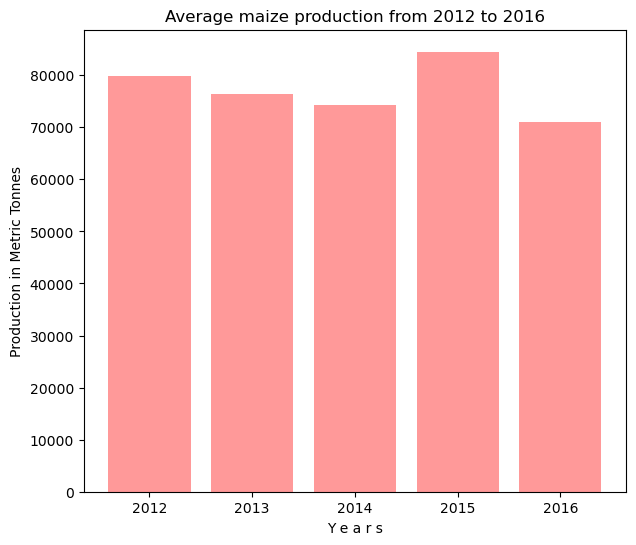

In [65]:
# Plotting of the most and least years production
production_averages=[production_2012,production_2013,production_2014,production_2015,production_2016]
plt.bar(["2012","2013","2014","2015","2016"],production_averages,color="red",alpha=0.4)
plt.xlabel("Y e a r s")
plt.ylabel("Production in Metric Tonnes")
plt.title('Average maize production from 2012 to 2016', fontsize=12)
plt.show()

# Step 6 - Objective 2; Counties that contribute most and least to maize production

In [66]:
# Sorting the production per year column -- Counties that produce highest maize production from 2012 to 2016 - Starting from highest
top_counties_2012=maize_2012.sort_values(by="Production (MT)",ascending=False).head(5)
print("Top 5 counties in 2012: ",top_counties_2012['COUNTY'].tolist())

top_counties_2013=maize_2013.sort_values(by="Production (MT)",ascending=False).head(5)
print("Top 5 counties in 2013: ",top_counties_2013['COUNTY'].tolist())

top_counties_2014=maize_2014.sort_values(by="Production (MT)",ascending=False).head(5)
print("Top 5 counties in 2014: ",top_counties_2014['COUNTY'].tolist())

top_counties_2015=maize_2015.sort_values(by="Production (MT)",ascending=False).head(5)
print("Top 5 counties in 2015: ",top_counties_2015['COUNTY'].tolist())

top_counties_2016=maize_2016.sort_values(by="Production (MT)",ascending=False).head(5)
print("Top 5 counties in 2016: ",top_counties_2016['COUNTY'].tolist())

Top 5 counties in 2012:  ['TRANS NZOIA', 'NAKURU', 'BUNGOMA', 'UASIN GISHU', 'NANDI']
Top 5 counties in 2013:  ['TRANS NZOIA', 'UASIN GISHU', 'NAROK', 'NAKURU', 'BUNGOMA']
Top 5 counties in 2014:  ['TRANS NZOIA', 'UASIN GISHU', 'NAROK', 'BUNGOMA', 'KAKAMEGA']
Top 5 counties in 2015:  ['TRANS NZOIA', 'UASIN GISHU', 'BUNGOMA', 'KAKAMEGA', 'NAROK']
Top 5 counties in 2016:  ['TRANS NZOIA', 'UASIN GISHU', 'BUNGOMA', 'NAROK', 'NAKURU']


In [67]:
# Bottom 5 maize producing counties starting from the least
bottom_counties_2012=maize_2012.sort_values(by="Production (MT)").head(5)
print("Bottom 5 counties in 2012: ",bottom_counties_2012['COUNTY'].tolist())

bottom_counties_2013=maize_2013.sort_values(by="Production (MT)").head(5)
print("Bottom 5 counties in 2013: ",bottom_counties_2013['COUNTY'].tolist())

bottom_counties_2014=maize_2014.sort_values(by="Production (MT)").head(5)
print("Bottom 5 counties in 2014: ",bottom_counties_2014['COUNTY'].tolist())

bottom_counties_2015=maize_2015.sort_values(by="Production (MT)").head(5)
print("Bottom 5 counties in 2015: ",bottom_counties_2015['COUNTY'].tolist())

bottom_counties_2016=maize_2016.sort_values(by="Production (MT)").head(5)
print("Bottom 5 counties in 2016: ",bottom_counties_2016['COUNTY'].tolist())

Bottom 5 counties in 2012:  ['MANDERA', 'WAJIR', 'MARSABIT', 'GARISSA', 'MOMBASA']
Bottom 5 counties in 2013:  ['GARISSA', 'KILIFI', 'WAJIR', 'MOMBASA', 'NAIROBI']
Bottom 5 counties in 2014:  ['WAJIR', 'GARISSA', 'KILIFI', 'MOMBASA', 'ISIOLO']
Bottom 5 counties in 2015:  ['WAJIR', 'GARISSA', 'MANDERA', 'MOMBASA', 'MARSABIT']
Bottom 5 counties in 2016:  ['WAJIR', 'MOMBASA', 'GARISSA', 'MARSABIT', 'MANDERA']


# Step 7 - Objective 3; Land used for maize production in each county for each year

In [68]:
# Land used for maize production in each county - Per Year - Per county -- ,  1 hectare = 0.01 sq.km
# 2012
surface_maize_2012=pd.merge(maize_2012,surface_filtered,how="outer",left_on="COUNTY",right_on="Counties")
#surface_maize_2012.head(47) # checks whether merging has taken place succesfully
area_2012=round(((surface_maize_2012['Harvested Area (HA)']*0.01)/(surface_maize_2012['Surface area (sq. km)']))*100,2)
surface_maize_2012['Percentage Land Used']=area_2012
surface_maize_2012.head(47)

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year,Country,Counties,Surface area (sq. km),Percentage Land Used
0,BARINGO,39753,71867,1.81,2012,Kenya,BARINGO,11015,3.61
1,BOMET,32697,73278,2.24,2012,Kenya,BOMET,2037,16.05
2,BUNGOMA,96209,262381,2.73,2012,Kenya,BUNGOMA,3593,26.78
3,BUSIA,41990,50102,1.19,2012,Kenya,BUSIA,1134,37.03
4,ELEGEYO-MARAKWET,31533,91964,2.92,2012,Kenya,ELEGEYO-MARAKWET,3030,10.41
5,EMBU,45215,46750,1.03,2012,Kenya,EMBU,2818,16.05
6,GARISSA,433,411,0.95,2012,Kenya,GARISSA,44175,0.01
7,HOMA BAY,67420,97513,1.45,2012,Kenya,HOMA BAY,2568,26.25
8,ISIOLO,987,979,0.99,2012,Kenya,ISIOLO,25336,0.04
9,KAJIADO,30145,2218,0.07,2012,Kenya,KAJIADO,21901,1.38


In [69]:
# 2013
surface_maize_2013=pd.merge(maize_2013,surface_filtered,how="outer",left_on="COUNTY",right_on="Counties")
#surface_maize_2013.head(47) # checks whether merging has taken place succesfully
area_2013=round(((surface_maize_2013['Harvested Area (HA)']*0.01)/(surface_maize_2013['Surface area (sq. km)']))*100,2)
surface_maize_2013['Percentage Land Used']=area_2013
surface_maize_2013.head(47)

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year,Country,Counties,Surface area (sq. km),Percentage Land Used
0,BARINGO,29117,55805,1.92,2013,Kenya,BARINGO,11015,2.64
1,BOMET,30620,72236,2.36,2013,Kenya,BOMET,2037,15.03
2,BUNGOMA,92705,221586,2.39,2013,Kenya,BUNGOMA,3593,25.80
3,BUSIA,45898,63230,1.38,2013,Kenya,BUSIA,1134,40.47
4,ELEGEYO-MARAKWET,32015,101336,3.17,2013,Kenya,ELEGEYO-MARAKWET,3030,10.57
5,EMBU,26820,35105,1.31,2013,Kenya,EMBU,2818,9.52
6,GARISSA,205,199,0.97,2013,Kenya,GARISSA,44175,0.00
7,HOMA BAY,74359,110380,1.48,2013,Kenya,HOMA BAY,2568,28.96
8,ISIOLO,1015,1073,1.06,2013,Kenya,ISIOLO,25336,0.04
9,KAJIADO,34721,63460,1.83,2013,Kenya,KAJIADO,21901,1.59


In [70]:
# 2014
surface_maize_2014=pd.merge(maize_2014,surface_filtered,how="outer",left_on="COUNTY",right_on="Counties")
#surface_maize_2014.head(47) # checks whether merging has taken place succesfully
area_2014=round(((surface_maize_2014['Harvested Area (HA)']*0.01)/(surface_maize_2014['Surface area (sq. km)']))*100,2)
surface_maize_2014['Percentage Land Used']=area_2014
surface_maize_2014.head(47)

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year,Country,Counties,Surface area (sq. km),Percentage Land Used
0,BARINGO,34960,34959,1.00,2014,Kenya,BARINGO,11015,3.17
1,BOMET,30940,53162,1.72,2014,Kenya,BOMET,2037,15.19
2,BUNGOMA,98074,267302,2.73,2014,Kenya,BUNGOMA,3593,27.30
3,BUSIA,50400,72662,1.44,2014,Kenya,BUSIA,1134,44.44
4,ELEGEYO-MARAKWET,27620,103448,3.75,2014,Kenya,ELEGEYO-MARAKWET,3030,9.12
5,EMBU,26720,26611,1.00,2014,Kenya,EMBU,2818,9.48
6,GARISSA,245,199,0.81,2014,Kenya,GARISSA,44175,0.01
7,HOMA BAY,79667,124465,1.56,2014,Kenya,HOMA BAY,2568,31.02
8,ISIOLO,1385,657,0.47,2014,Kenya,ISIOLO,25336,0.05
9,KAJIADO,31020,73396,2.37,2014,Kenya,KAJIADO,21901,1.42


In [71]:
# 2015
surface_maize_2015=pd.merge(maize_2015,surface_filtered,how="outer",left_on="COUNTY",right_on="Counties")
#surface_maize_2015.head(47) # checks whether merging has taken place succesfully
area_2015=round(((surface_maize_2015['Harvested Area (HA)']*0.01)/(surface_maize_2015['Surface area (sq. km)']))*100,2)
surface_maize_2015['Percentage Land Used']=area_2015
surface_maize_2015.head()

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year,Country,Counties,Surface area (sq. km),Percentage Land Used
0,BARINGO,44159,83313,1.89,2015,Kenya,BARINGO,11015,4.01
1,BOMET,35727,38720,1.08,2015,Kenya,BOMET,2037,17.54
2,BUNGOMA,97397,260266,2.67,2015,Kenya,BUNGOMA,3593,27.11
3,BUSIA,50781,86526,1.70,2015,Kenya,BUSIA,1134,44.78
4,ELEGEYO-MARAKWET,33598,78020,2.32,2015,Kenya,ELEGEYO-MARAKWET,3030,11.09


In [72]:
# 2016
surface_maize_2016=pd.merge(maize_2016,surface_filtered,how="outer",left_on="COUNTY",right_on="Counties")
#surface_maize_2016.head(47) # checks whether merging has taken place succesfully
area_2016=round(((surface_maize_2016['Harvested Area (HA)']*0.01)/(surface_maize_2016['Surface area (sq. km)']))*100,2)
surface_maize_2016['Percentage Land Used']=area_2016
surface_maize_2016.head()

,COUNTY,Harvested Area (HA),Production (MT),Yield (MT/HA),Year,Country,Counties,Surface area (sq. km),Percentage Land Used
0,BARINGO,33163,72495,2.19,2016,Kenya,BARINGO,11015,3.01
1,BOMET,32275,45517,1.41,2016,Kenya,BOMET,2037,15.84
2,BUNGOMA,100712,301068,2.99,2016,Kenya,BUNGOMA,3593,28.03
3,BUSIA,38441,36631,0.95,2016,Kenya,BUSIA,1134,33.90
4,ELEGEYO-MARAKWET,33315,75005,2.25,2016,Kenya,ELEGEYO-MARAKWET,3030,11.00


In [73]:
# Plotting choropleth maps for each year 
# County names on geojson file should match those on the above dataframes for accurate plotting
pio.renderers.default = 'browser'   # displays output  in a new web page in the default browser


fig=make_subplots(rows=3,cols=2,
                 specs=[
                     [{"type": "choropleth"},{"type": "choropleth"}],
                      [{"type": "choropleth"},{"type": "choropleth"}],
                       [{"type": "choropleth"},{"type": "choropleth"}],],
                  subplot_titles=("2012", "2013", "2014", "2015","2016"),
                  horizontal_spacing=0,
                  vertical_spacing=0
)

fig.add_trace(trace=go.Choropleth(geojson=Kenya_counties,
                                 locations=surface_maize_2012['COUNTY'],
                                 z=surface_maize_2012['Percentage Land Used'],
                                 hoverinfo='location+z',
                                 showlegend=False,
                                  showscale=False,
                                 colorscale='YlGn',
                                  colorbar_title="% Harvest Area"),
              row=1,col=1)

fig.add_trace(trace=go.Choropleth(geojson=Kenya_counties,
                                 locations=surface_maize_2013['COUNTY'],
                                 z=surface_maize_2013['Percentage Land Used'],
                                 hoverinfo='location+z',
                                 showlegend=False,
                                 showscale=False,
                                 colorscale='YlGn',
                                  colorbar_title="% Harvest Area"),
             row=1,col=2)

fig.add_trace(trace=go.Choropleth(geojson=Kenya_counties,
                                 locations=surface_maize_2014['COUNTY'],
                                 z=surface_maize_2014['Percentage Land Used'],
                                 hoverinfo='location+z',
                                 showlegend=False,
                                 showscale=False,
                                 colorscale='YlGn',
                                  colorbar_title="% Harvest Area"),
             row=2,col=1)

fig.add_trace(trace=go.Choropleth(geojson=Kenya_counties,
                                 locations=surface_maize_2015['COUNTY'],
                                 z=surface_maize_2015['Percentage Land Used'],
                                 hoverinfo='location+z',
                                 showlegend=False,
                                 showscale=False,
                                 colorscale='YlGn',
                                  colorbar_title="% Harvest Area"),
             row=2,col=2)

fig.add_trace(trace=go.Choropleth(geojson=Kenya_counties,
                                 locations=surface_maize_2016['COUNTY'],
                                 z=surface_maize_2016['Percentage Land Used'],
                                 hoverinfo='location+z',
                                 colorscale='YlGn',
                                  colorbar_title="% Harvest Area"),
             row=3,col=1)

fig.update_geos(fitbounds="locations",
                    visible=False)  # visibility of base layer

fig.update_layout(
    title='SURFACE AREA USED FOR MAIZE CULTIVATION PER YEAR PER COUNTY',
    title_font_size = 25,
    title_x=0.4,
    autosize=False,
    width=1800,
    height=1800
)


#fig.show()
pio.write_html(fig, file='index.html', auto_open=True) # the output is made into a html file and opened simultaneously

# Step 8 - Objective 4; How precipitation affects maize production

Percentage of rain per year : [20.84517259 21.21670756 16.94374392 21.27967478 19.71470115]
Perecentage of maize per year : [20.65995208 19.79396752 19.26167736 21.88715105 18.39725199]


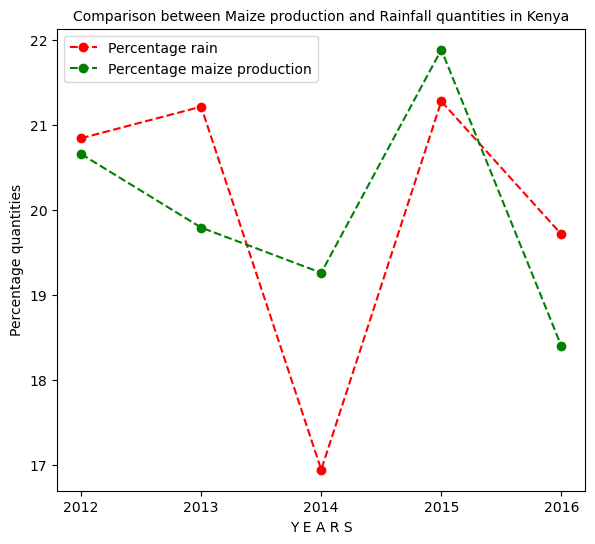

In [74]:
# comparing average precipitation and average maize production for each year
rain_data=[rain_2012,rain_2013,rain_2014,rain_2015,rain_2016]
maize_data=[production_2012,production_2013,production_2014,production_2015,production_2016]
#print(rain_data)
#print(maize_data)
# Normalizing the data through percentages
rain_percent=((rain_data)/(np.sum(rain_data)))*100
print("Percentage of rain per year :",rain_percent)
maize_percent=((maize_data)/(np.sum(maize_data)))*100
print("Perecentage of maize per year :",maize_percent)

# Plotting line charts
fig1=plt.figure()
fig1.set_figheight(6)# adjusting the height of the figure
fig1.set_figwidth(15)
maize_rain=fig1.add_subplot(1,2,1)
maize_rain.set_xticks([0,1,2,3,4])
maize_rain.set_xticklabels(["2012","2013","2014","2015","2016"])
maize_rain.set_title("Comparison between Maize production and Rainfall quantities in Kenya", fontsize=10)
maize_rain.set_xlabel("Y E A R S")
maize_rain.set_ylabel("Percentage quantities")
maize_rain.plot(rain_percent,"ro--",label="Percentage rain") # plotting two charts on same axis
maize_rain.plot(maize_percent,"go--",label="Percentage maize production")  # plotting two charts on same axis
maize_rain.legend()

# Step 9 - Objective 5; Comparing maize production against maize consumption

In [75]:
# comparing maize production and local consumption/demand
print("Approximate local consumption in MT: ",local_demand_data)

# Calculating total maize production for each year
maize_2012=production_complete[production_complete['Year']==2012]
total_production_2012=np.sum(maize_2012['Production (MT)'])
print("Total maize production for 2012 is: ",total_production_2012)

maize_2013=production_complete[production_complete['Year']==2013]
total_production_2013=np.sum(maize_2013['Production (MT)'])
print("Total maize production for 2013 is: ",total_production_2013)

maize_2014=production_complete[production_complete['Year']==2014]
total_production_2014=np.sum(maize_2014['Production (MT)'])
print("Total maize production for 2014 is: ",total_production_2014)

maize_2015=production_complete[production_complete['Year']==2015]
total_production_2015=np.sum(maize_2015['Production (MT)'])
print("Total maize production for 2015 is: ",total_production_2015)

maize_2016=production_complete[production_complete['Year']==2016]
total_production_2016=np.sum(maize_2016['Production (MT)'])
print("Total maize production for 2016 is: ",total_production_2016)

total_maize_production=[total_production_2012,total_production_2013,total_production_2014,total_production_2015,total_production_2016]
print(total_maize_production)

Approximate local consumption in MT:  [3950000 3950000 4150000 4150000 3850000]
Total maize production for 2012 is:  3749872
Total maize production for 2013 is:  3592692
Total maize production for 2014 is:  3496079
Total maize production for 2015 is:  3972614
Total maize production for 2016 is:  3339182
[3749872, 3592692, 3496079, 3972614, 3339182]


Text(0.5, 0, 'Quantity in Metric Tonnes(1,000,000 MT)')

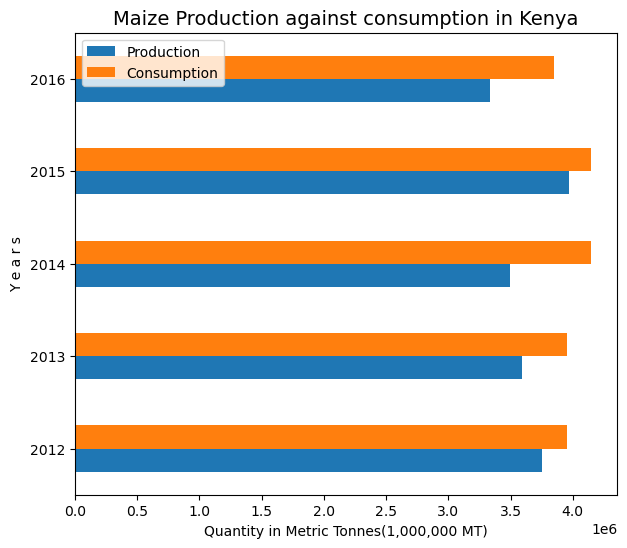

In [76]:
# Plotting objective 5
#print(local_demand_data)
#print(total_maize_production)


yrs=("2012","2013","2014","2015","2016")

p1=pd.DataFrame({"Production":total_maize_production,"Consumption":local_demand_data})
plt.rcParams["figure.figsize"] = (7,6) # Setting plot size(width and height)
p1.plot.barh()
plt.legend(loc='upper left') # setting legend position
plt.title('Maize Production against consumption in Kenya', fontsize=14)

# Labeling the barticks on y axis
loc = range(len(yrs))
labels = yrs
plt.yticks(loc, labels, rotation='horizontal')

# Labelling x and y axis
plt.ylabel("Y e a r s")
plt.xlabel("Quantity in Metric Tonnes(1,000,000 MT)")